In [117]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns



ani = pd.read_csv('aac_intakes_outcomes.csv', encoding='ISO/8859/1') 
    



Aquí creo una columna en la que aparece si un perro es mezcla o no

In [118]:
def mixed(x): 
    return 'mix' in x.lower() or '/' in x.lower()


ani['Mix'] = ani.breed.apply(mixed)
    
ani.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,Mix
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,True
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,True
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,True
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,False
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,False


In [119]:
null_cols = ani.isnull().sum()
null_cols[null_cols > 0]
   

outcome_subtype     43324
outcome_type           10
sex_upon_outcome        1
sex_upon_intake         1
dtype: int64

En este apartado elimino columnas que no voy a necesitar

In [120]:
ani.drop(['age_upon_outcome_age_group','age_upon_outcome','outcome_subtype','age_upon_outcome_(days)','intake_monthyear','time_in_shelter','outcome_monthyear','dob_monthyear',
  'found_location','count','time_in_shelter','date_of_birth','age_upon_intake_age_group','intake_datetime','outcome_datetime','intake_hour','outcome_weekday','sex_upon_outcome','sex_upon_intake','age_upon_intake_(days)','outcome_hour','dob_month','dob_year','dob_monthyear','animal_id_intake','time_in_shelter_days','intake_weekday','intake_year','intake_month','outcome_month','outcome_year','outcome_number','age_upon_intake','color','intake_type','intake_number','intake_condition','age_upon_intake_(years)'], axis='columns', inplace=True)
ani.head() 

,animal_id_outcome,outcome_type,age_upon_outcome_(years),animal_type,breed,Mix
0,A006100,Return to Owner,10.0,Dog,Spinone Italiano Mix,True
1,A006100,Return to Owner,7.0,Dog,Spinone Italiano Mix,True
2,A006100,Return to Owner,6.0,Dog,Spinone Italiano Mix,True
3,A047759,Transfer,10.0,Dog,Dachshund,False
4,A134067,Return to Owner,16.0,Dog,Shetland Sheepdog,False


Solo voy a analizar los perros por lo tanto elimino a los otros animales

In [121]:
ani = ani.drop(ani[ani['animal_type']=='Cat'].index)
ani = ani.drop(ani[ani['animal_type']=='Other'].index)
ani = ani.drop(ani[ani['animal_type']=='Bird'].index)
 

Api

In [124]:
response = requests.get('https://dog.ceo/api/breeds/list')
data = pd.DataFrame(response.json())
 



    

In [125]:
fotos=[]
for i in ani['breed']:
        fotos.append(('https://dog.ceo/api/breed/{}/images/random').format(i))
ani['fotos']=fotos
ani 

,animal_id_outcome,outcome_type,age_upon_outcome_(years),animal_type,breed,Mix,fotos
0,A006100,Return to Owner,10.000000,Dog,Spinone Italiano Mix,True,https://dog.ceo/api/breed/Spinone Italiano Mix...
1,A006100,Return to Owner,7.000000,Dog,Spinone Italiano Mix,True,https://dog.ceo/api/breed/Spinone Italiano Mix...
2,A006100,Return to Owner,6.000000,Dog,Spinone Italiano Mix,True,https://dog.ceo/api/breed/Spinone Italiano Mix...
3,A047759,Transfer,10.000000,Dog,Dachshund,False,https://dog.ceo/api/breed/Dachshund/images/random
4,A134067,Return to Owner,16.000000,Dog,Shetland Sheepdog,False,https://dog.ceo/api/breed/Shetland Sheepdog/im...
5,A141142,Return to Owner,15.000000,Dog,Labrador Retriever/Pit Bull,True,https://dog.ceo/api/breed/Labrador Retriever/P...
6,A163459,Return to Owner,15.000000,Dog,Miniature Schnauzer Mix,True,https://dog.ceo/api/breed/Miniature Schnauzer ...
7,A165752,Return to Owner,15.000000,Dog,Lhasa Apso Mix,True,https://dog.ceo/api/breed/Lhasa Apso Mix/image...
8,A178569,Return to Owner,15.000000,Dog,Shetland Sheepdog Mix,True,https://dog.ceo/api/breed/Shetland Sheepdog Mi...
9,A189592,Return to Owner,18.000000,Dog,Shetland Sheepdog Mix,True,https://dog.ceo/api/breed/Shetland Sheepdog Mi...


In [126]:
ani['breed'] = ani['breed'].str.replace('Akita/Mastiff','akita').str.replace('Akita Mix','akita').str.replace('Anatol Shepherd/Akita','akita').str.replace('Akita/Labrador Retriever','akita').str.replace('Beagle Mix','beagle').str.replace('Beagle/Cairn Terrier','beagle').str.replace('Beagle/German Shepherd','beagle').str.replace('Beagle','beagle').str.replace('Beagle/Basset Hound','beagle').str.replace('Beagle/Labrador Retriever','beagle').str.replace('Beagle/Pug','beagle').str.replace('Beagle/Rat Terrier','beagle').str.replace('Beagle/Australian Cattle Dog','beagle').str.replace('Beagle/Parson Russell Terrier','beagle').str.replace('Beagle/Queensland Heeler','beagle').str.replace('Beagle/Chihuahua Longhair','beagle').str.replace('Beagle/American Staffordshire Terrier','beagle').str.replace('Beagle/Dachshund','beagle').str.replace('Beagle/Cocker Spaniel','beagle').str.replace('Beagle/Boxer','beagle').str.replace('Beagle/Jack Russell Terrier','beagle').str.replace('Beagle/Cavalier Span','beagle').str.replace('Beagle/Chinese Sharpei','beagle').str.replace('Beagle/Whippet','beagle').str.replace('Beagle/Pit Bull','beagle').str.replace('Beagle/Pointer','beagle').str.replace('Beagle/Cardigan Welsh Corgi','beagle').str.replace('Beagle/Staffordshire','beagle').str.replace('Beagle/Standard Poodle','beagle').str.replace('Beagle/Vizsla','beagle').str.replace('Beagle/Black Mouth Cur','beagle').str.replace('Beagle/Harrier','beagle').str.replace('Beagle/Pointer','beagle').str.replace('Beagle/Treeing Walker Coonhound','beagle').str.replace('Beagle/Pembroke Welsh Corgi','beagle').str.replace('Beagle/Australian Kelpie','beagle').str.replace('Beagle/Catahoula','beagle').str.replace('Beagle/Mastiff','beagle').str.replace('Beagle/Chinese Sharpei','beagle').str.replace('Beagle/Miniature Pinscher','beagle').str.replace('Boxer Mix','boxer').str.replace('Boxer/Beagle','boxer').str.replace('Boxer/Pit Bull','boxer').str.replace('Boxer','boxer').str.replace('Boxer/English Bulldog','boxer').str.replace('Boxer/Labrador Retriever','boxer').str.replace('Boxer/Staffordshire','boxer').str.replace('Boxer/Jack Russell Terrier','boxer').str.replace('Boxer/Greyhound','boxer').str.replace('Boxer/Redbone Hound','boxer').str.replace('Boxer/Catahoula','boxer').str.replace('Boxer/German Shepherd','boxer').str.replace('Boxer/Doberman Pinsch','boxer').str.replace('Boxer/American Bulldog','boxer').str.replace('Boxer/Rhod Ridgeback','boxer').str.replace('Boxer/Pointer','boxer').str.replace('Boxer/Cardigan Welsh Corgi','boxer').str.replace('Boxer/Neapolitan Mastiff','boxer').str.replace('Boxer/Queensland Heeler','boxer').str.replace('Boxer/Black Mouth Cur','boxer').str.replace('Boxer/American Staffordshire Terrier','boxer').str.replace('Boxer/Australian Cattle Dog','boxer').str.replace('Boxer/Boston Terrier','boxer').str.replace('Boxer/Great Dane','boxer').str.replace('Boxer/Staffordshire','boxer').str.replace('Boxer/Dogue De Bordeaux','boxer').str.replace('Boxer/Chinese Sharpei','boxer').str.replace('Boxer/Border Collie','boxer').str.replace('Boxer/Miniature Poodle','boxer').str.replace('Boxer/Bulldog','boxer').str.replace('Boxer/Akita','boxer').str.replace('Boxer/Harrier','boxer').str.replace('Boxer/Great Pyrenees','boxer').str.replace('Boxer/Bullmastiff','boxer').str.replace('American Bulldog Mix','bulldog').str.replace('English Bulldog','bulldog').str.replace('Bulldog/Pit Bull','bulldog').str.replace('English Bulldog Mix','bulldog').str.replace('American Bulldog','bulldog').str.replace('Old English Bulldog Mix','bulldog').str.replace('American Bulldog/Pit Bull','bulldog').str.replace('Bulldog/Australian Cattle Dog','bulldog').str.replace('American Bulldog/Pointer','bulldog').str.replace('English Bulldog/American Staffordshire Terrier','bulldog').str.replace('American Bulldog/Labrador Retriever','bulldog').str.replace('French Bulldog Mix','bulldog').str.replace('French Bulldog/Chihuahua Shorthair','bulldog').str.replace('English Bulldog/Cairn Terrier','bulldog').str.replace('American Bulldog/Blue Lacy','bulldog').str.replace('American Bulldog/American Staffordshire Terrier','bulldog').str.replace('English Bulldog/Dachshund','bulldog').str.replace('American Bulldog/Chinese Sharpei','bulldog').str.replace('Bulldog/Boston Terrier','bulldog').str.replace('American Bulldog/Boxer','bulldog').str.replace('English Bulldog/American Bulldog','bulldog').str.replace('English Bulldog/Staffordshire','bulldog').str.replace('English Bulldog/Staffordshire','bulldog').str.replace('French Bulldog/English Bulldog','bulldog').str.replace('French Bulldog/Pug','bulldog').str.replace('English Bulldog/Boxer','bulldog').str.replace('American Bulldog/Basset Hound','bulldog').str.replace('French Bulldog/Miniature Schnauzer','bulldog').str.replace('American Bulldog/Great Pyrenees','bulldog').str.replace('English Bulldog/Beagle','bulldog').str.replace('English Bulldog/Australian Cattle Dog','bulldog').str.replace('American Bulldog/Dalmatian','bulldog').str.replace('Chihuahua Shorthair/Basenji','chihuahua').str.replace('Chihuahua Shorthair','chihuahua').str.replace('Chihuahua Shorthair Mix','chihuahua').str.replace('Chihuahua Longhair Mix','chihuahua').str.replace('Chihuahua Longhair/Pekingese','chihuahua').str.replace('Chihuahua Shorthair/Rat Terrier','chihuahua').str.replace('Chihuahua Shorthair/Dachshund','chihuahua').str.replace('Chihuahua Shorthair/Wire Hair Fox Terrier','chihuahua').str.replace('Chihuahua Shorthair/Miniature Pinscher','chihuahua').str.replace('Chihuahua Longhair/Pomeranian','chihuahua').str.replace('Chihuahua Shorthair/Australian Cattle Dog','chihuahua').str.replace('Chihuahua Shorthair/Beagle','chihuahua').str.replace('Chihuahua Longhair','chihuahua').str.replace('Chihuahua Shorthair/Italian Greyhound','chihuahua').str.replace('Chihuahua Shorthair/Bichon Frise','chihuahua').str.replace('Chihuahua Shorthair/Pug','chihuahua').str.replace('Chihuahua Shorthair/Mexican Hairless','chihuahua').str.replace('Chihuahua Shorthair/Cardigan Welsh Corgi','chihuahua').str.replace('Chihuahua Longhair/Papillon','chihuahua').str.replace('Chihuahua Shorthair/Whippet','chihuahua').str.replace('Chihuahua Shorthair/Cardigan Welsh Corgi','chihuahua').str.replace('Chihuahua Shorthair/Jack Russell Terrier','chihuahua').str.replace('Chihuahua Shorthair/Cirneco','chihuahua').str.replace('Chihuahua Shorthair/Border Terrier','chihuahua') .str.replace('Chihuahua Shorthair/Swedish Vallhund','chihuahua').str.replace('Chihuahua Shorthair/Welsh Terrier','chihuahua').str.replace('Chihuahua Shorthair/Manchester Terrier','chihuahua').str.replace('Chihuahua Shorthair/Miniature Schnauzer','chihuahua').str.replace('Chihuahua Shorthair/Shiba Inu ','chihuahua').str.replace('Chihuahua Shorthair/Labrador Retriever','chihuahua') .str.replace('Chihuahua Shorthair/Italian Greyhound','chihuahua').str.replace('Chihuahua Shorthair/Norfolk Terrier','chihuahua').str.replace('Chihuahua Shorthair/Schipperke','chihuahua').str.replace('Chihuahua Shorthair/Shih Tzu','chihuahua').str.replace('Border Collie Mix','collie').str.replace('Border Collie','collie').str.replace('Border Collie/Catahoula','collie').str.replace('Border Collie/Chow Chow','collie').str.replace('Border Collie/Akita','collie').str.replace('Border Collie/Labrador Retriever','collie').str.replace('Border Collie/Boxer','collie').str.replace('Border Collie/Parson Russell Terrier','collie').str.replace('Border Collie/Bernese Mountain Dog','collie').str.replace('Border Collie/Miniature Pinscher','collie').str.replace('Border Collie/Australian Cattle Dog','collie').str.replace('Border Collie/Pointer','collie').str.replace('Border Collie/Mastiff','collie').str.replace('Border Collie/Pomeranian','collie').str.replace('Border Collie/Pit Bull','collie').str.replace('Border Collie/Anatol Shepherd','collie').str.replace('Dalmatian Mix','dalmatian').str.replace('Dalmatian/Basset Hound','dalmatian').str.replace('Dalmatian/Labrador Retriever','dalmatian').str.replace('Dalmatian/Pointer','dalmatian').str.replace('Dalmatian/Australian Cattle Dog','dalmatian').str.replace('Dalmatian/boxer','dalmatian').str.replace('Dalmatian/Pit Bull','dalmatian').str.replace('Dalmatian/Plott Hound','dalmatian').str.replace('Great Dane Mix','dane').str.replace('Great Dane/Labrador Retriever','dane').str.replace('Great Dane/Pit Bull','dane').str.replace('Great Dane/Mastiff','dane').str.replace('Great Dane/Anatol Shepherd','dane').str.replace('Great Dane/Staffordshire','dane').str.replace('Great Dane/Australian Cattle Dog','dane').str.replace('Great Dane/boxer','dane').str.replace('Great Dane/Pointer','dane').str.replace('Great Dane/boxer','dane').str.replace('Doberman Pinsch Mix','doberman').str.replace('Doberman Pinsch/German Shepherd','doberman').str.replace('Doberman Pinsch','doberman').str.replace('Doberman Pinsch/collie','doberman').str.replace('Doberman Pinsch/Pit Bull','doberman').str.replace('Doberman Pinsch/Labrador Retriever','doberman').str.replace('Doberman Pinsch/Australian Cattle Dog','doberman').str.replace('Doberman Pinsch/Vizsla','doberman').str.replace('Doberman Pinsch/Rottweiler','doberman').str.replace('Doberman Pinsch/Black/Tan Hound','doberman').str.replace('German Shepherd/Labrador Retriever','germanshepherd').str.replace('German Shepherd Mix','germanshepherd').str.replace('German Shepherd','germanshepherd').str.replace('German Shepherd/collie','germanshepherd').str.replace('German Shepherd/Siberian Husky','germanshepherd').str.replace('German Shepherd/Rottweiler','germanshepherd').str.replace('German Shepherd/Golden Retriever','germanshepherd').str.replace('German Shepherd/Chow Chow','germanshepherd').str.replace('German Shepherd/Akita','germanshepherd').str.replace('German Shepherd/Alaskan Husky','germanshepherd').str.replace('German Shepherd/Black/Tan Hound','germanshepherd').str.replace('German Shepherd/boxer','germanshepherd').str.replace('German Shepherd/Alaskan Malamute','germanshepherd').str.replace('German Shepherd/Pit Bull','germanshepherd')
ani['breed'] = ani['breed'].str.replace('German Shepherd/Cardigan Welsh Corgi','germanshepherd').str.replace('German Shepherd/Collie Rough','germanshepherd').str.replace('German Shepherd/Nova Scotia Duck Tolling Retriever','germanshepherd').str.replace('German Shepherd/Mastiff','germanshepherd').str.replace('German Shepherd/Collie Smooth','germanshepherd').str.replace('German Shepherd/Australian Cattle Dog','germanshepherd').str.replace('German Shepherd/Alaskan Malamute','germanshepherd').str.replace('German Shepherd/boxer','germanshepherd').str.replace('German Shepherd/Catahoula','germanshepherd').str.replace('German Shepherd/Redbone Hound','germanshepherd').str.replace('German Shepherd/Doberman Pinsch','germanshepherd').str.replace('German Shepherd/Great Pyrenees','germanshepherd').str.replace('German Shepherd/Swedish Vallhund','germanshepherd').str.replace('German Shepherd/Chinese Sharpei','germanshepherd').str.replace('German Shepherd/Pembroke Welsh Corgi','germanshepherd').str.replace('German Shepherd/Cardigan Welsh Corgi','germanshepherd').str.replace('German Shepherd/Anatol Shepherd','germanshepherd').str.replace('German Shepherd/Bull Terrier','germanshepherd').str.replace('German Shepherd/Australian Kelpie','germanshepherd').str.replace('German Shepherd/Black Mouth Cur','germanshepherd').str.replace('German Shepherd/Pembroke Welsh Corgi','germanshepherd').str.replace('Siberian Husky Mix','husky').str.replace('Siberian Husky/Labrador Retriever','husky').str.replace('Siberian Husky','husky').str.replace('Alaskan Husky Mix','husky').str.replace('Siberian Husky/German Shepherd','husky').str.replace('Siberian Husky/collie','husky').str.replace('Siberian Husky/German Shepherd','husky').str.replace('Siberian Husky/Australian Cattle Dog','husky').str.replace('Siberian Husky/German Shepherd','husky').str.replace('Siberian Husky/German Shepherd','husky')

   




In [127]:
list_breed=['bulldog','boxer','beagle','husky','akita','chihuahua','collie','dalmatian','dane','doberman','germanshepherd' ]
ani=ani[ani['breed'].isin(list_breed)]
  

In [128]:
set(ani['breed'])

{'akita',
 'beagle',
 'boxer',
 'bulldog',
 'chihuahua',
 'collie',
 'dalmatian',
 'dane',
 'doberman',
 'germanshepherd',
 'husky'}

In [129]:
display(ani)

,animal_id_outcome,outcome_type,age_upon_outcome_(years),animal_type,breed,Mix,fotos
13,A208755,Euthanasia,14.000000,Dog,collie,True,https://dog.ceo/api/breed/Border Collie Mix/im...
14,A210457,Adoption,17.000000,Dog,chihuahua,False,https://dog.ceo/api/breed/Chihuahua Shorthair/...
15,A212672,Return to Owner,13.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd/Labr...
32,A249087,Adoption,15.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...
33,A251095,Euthanasia,14.000000,Dog,collie,False,https://dog.ceo/api/breed/Border Collie/images...
34,A251214,Return to Owner,12.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...
56,A283735,Euthanasia,13.000000,Dog,doberman,True,https://dog.ceo/api/breed/Doberman Pinsch Mix/...
57,A284639,Return to Owner,11.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...
73,A298677,Euthanasia,13.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...
75,A302820,Adoption,11.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...


In [130]:
ani = ani.drop(ani[ani['outcome_type']=='Transfer'].index)
ani = ani.drop(ani[ani['outcome_type']=='Rto-Adopt'].index)
ani = ani.drop(ani[ani['outcome_type']=='Adoption'].index)
ani = ani.drop(ani[ani['outcome_type']=='Return to Owner'].index)
ani = ani.drop(ani[ani['outcome_type']=='Died'].index)
ani = ani.drop(ani[ani['outcome_type']=='Disposal'].index)


list(ani['outcome_type'])
ani['outcome_type'].value_counts()
  


Euthanasia    185
Name: outcome_type, dtype: int64

In [131]:
ani = ani.rename(columns={'age_upon_outcome_(years)':'age_upon_outcome_years'
                            })
 
 

In [132]:
ani['breed'].value_counts()
  

germanshepherd    68
boxer             32
collie            19
chihuahua         18
husky             18
bulldog           15
beagle             7
doberman           7
dane               1
dalmatian          1
Name: breed, dtype: int64

In [133]:
ani_test=ani.drop(ani[ani['outcome_type']!='Euthanasia'].index)
ani_test=ani_test.drop(ani_test[ani_test['age_upon_outcome_years']<1.0].index)
ani_test['breed'].value_counts(1).round(2)*100
  
 

germanshepherd    38.0
boxer             18.0
collie            11.0
bulldog            9.0
husky              9.0
chihuahua          7.0
doberman           4.0
beagle             3.0
dalmatian          1.0
dane               1.0
Name: breed, dtype: float64

he calculado el porcentaje segun la raza de perros mayores de un año que han sufrido eutanasia siendo germanshepherd el que mas sufre esto

In [134]:
ani_test2=ani.drop(ani[ani['outcome_type']!='Euthanasia'].index)
ani_test2=ani_test2.drop(ani_test2[ani_test2['age_upon_outcome_years']>1.0].index)
ani_test2['breed'].value_counts(1).round(2)*100



germanshepherd    34.0
chihuahua         16.0
husky             12.0
boxer              9.0
collie             9.0
bulldog            9.0
beagle             6.0
dane               3.0
Name: breed, dtype: float64

he calculado el porcentaje segun la raza de perros menores de un año que han sufrido eutanasia,la raza que mas sufre esto es el germanshpherd

In [135]:
bins = [0,2,6,10,19]
edades = ['0-1', '2-5', '6-10', '10-19']
ani['bins'] = pd.cut(ani['age_upon_outcome_years'], bins ,labels=edades)
   
ani.head()





,animal_id_outcome,outcome_type,age_upon_outcome_years,animal_type,breed,Mix,fotos,bins
13,A208755,Euthanasia,14.0,Dog,collie,True,https://dog.ceo/api/breed/Border Collie Mix/im...,10-19
33,A251095,Euthanasia,14.0,Dog,collie,False,https://dog.ceo/api/breed/Border Collie/images...,10-19
56,A283735,Euthanasia,13.0,Dog,doberman,True,https://dog.ceo/api/breed/Doberman Pinsch Mix/...,10-19
73,A298677,Euthanasia,13.0,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...,10-19
80,A305674,Euthanasia,12.0,Dog,husky,True,https://dog.ceo/api/breed/Siberian Husky Mix/i...,10-19


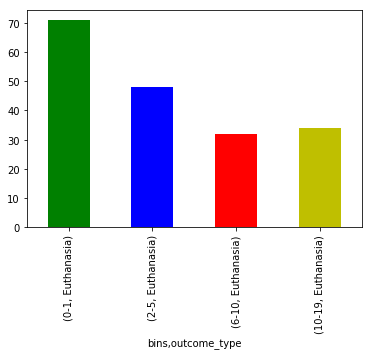

In [146]:

w=ani.groupby('bins')['outcome_type'].value_counts()
w_1=w.plot(kind='bar', color=['g', 'b', 'r','y','purple','orange','pink'])


Segun el rango de edad reciben mas eutanasias los perros entre 0 y 1 años

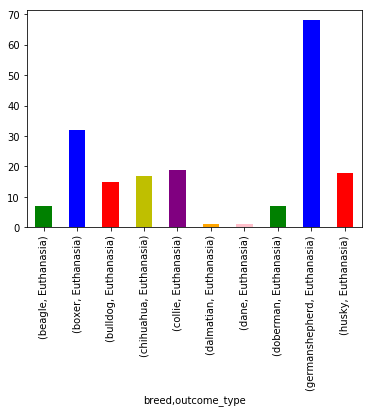

In [145]:
v=ani.groupby('breed')['outcome_type'].value_counts()
v_1=v.plot(kind='bar', color=['g', 'b', 'r','y','purple','orange','pink'])

#En esta grafica comprobamos que la raza que recibe mas eutanasias son los pastores alemanes

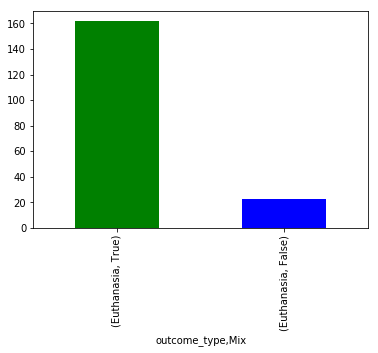

In [144]:
z=ani.groupby('outcome_type')['Mix'].value_counts()
z_1=z.plot(kind='bar', color=['g', 'b', 'r','grey','y','purple','orange','brown','pink'])

En esta grafica podemos comprobar que se realizan mas eutanasias a perros con mezcla que puros

In [139]:
display(ani)

,animal_id_outcome,outcome_type,age_upon_outcome_years,animal_type,breed,Mix,fotos,bins
13,A208755,Euthanasia,14.000000,Dog,collie,True,https://dog.ceo/api/breed/Border Collie Mix/im...,10-19
33,A251095,Euthanasia,14.000000,Dog,collie,False,https://dog.ceo/api/breed/Border Collie/images...,10-19
56,A283735,Euthanasia,13.000000,Dog,doberman,True,https://dog.ceo/api/breed/Doberman Pinsch Mix/...,10-19
73,A298677,Euthanasia,13.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...,10-19
80,A305674,Euthanasia,12.000000,Dog,husky,True,https://dog.ceo/api/breed/Siberian Husky Mix/i...,10-19
99,A318615,Euthanasia,14.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...,10-19
174,A358879,Euthanasia,13.000000,Dog,germanshepherd,False,https://dog.ceo/api/breed/German Shepherd/imag...,10-19
186,A367012,Euthanasia,11.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...,10-19
294,A427866,Euthanasia,8.000000,Dog,germanshepherd,True,https://dog.ceo/api/breed/German Shepherd Mix/...,6-10
418,A464652,Euthanasia,11.000000,Dog,collie,True,https://dog.ceo/api/breed/Border Collie Mix/im...,10-19


In [143]:
ani.to_csv('Ani-hub.csv')